In [42]:
# Helpful docs : https://huggingface.co/datasets/openclimatefix/uk_pv

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
metadata_df = pd.read_csv('data/uk_pv/metadata.csv')


In [6]:
metadata_df.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


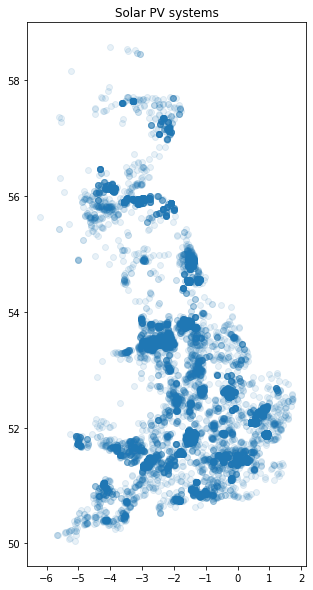

In [8]:
fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
plt.title("Solar PV systems");
#plt.savefig('images/pv_sites.jpg')

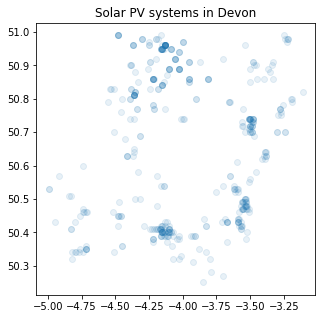

In [19]:
# Find some systems in Devon

longitude_cond = (metadata_df.longitude_rounded <= -3) & (metadata_df.longitude_rounded >= -5)
latitude_cond = (metadata_df.latitude_rounded <= 51) & (metadata_df.latitude_rounded >= 50)

devon_df = metadata_df[ (longitude_cond) &(latitude_cond)]


fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(devon_df.longitude_rounded, devon_df.latitude_rounded, alpha=0.1, label=devon_df.ss_id)
plt.title("Solar PV systems in Devon");

In [27]:
devon_df.iloc[1].ss_id

2689

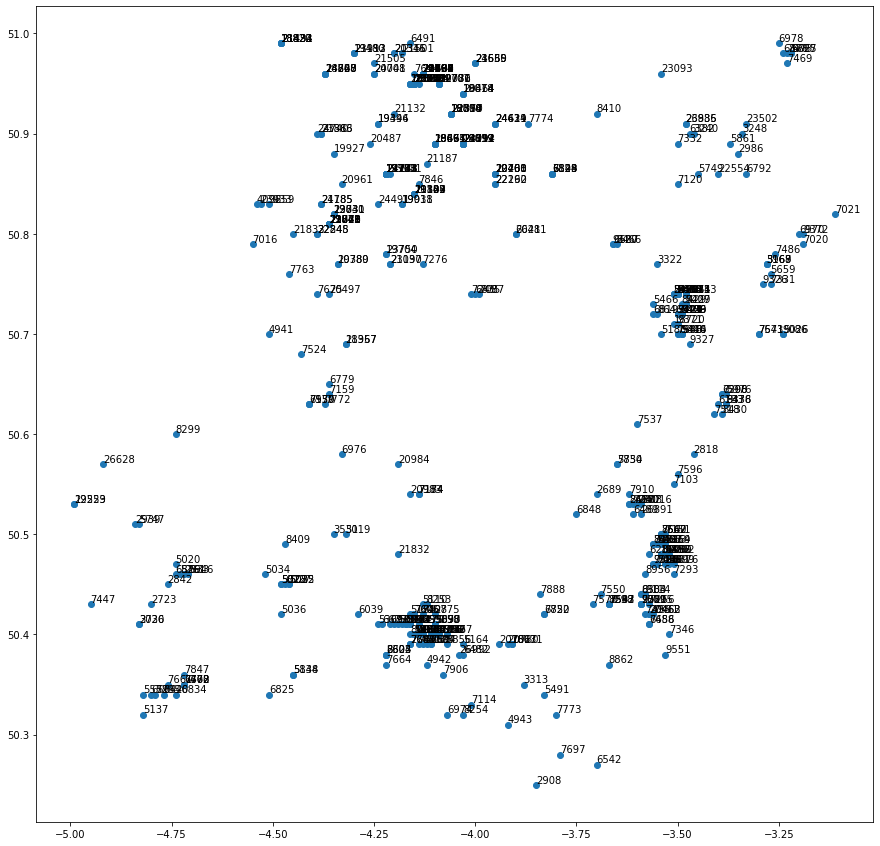

In [30]:
fig, ax = plt.subplots(figsize=(15,15))


plt.scatter(devon_df.longitude_rounded, devon_df.latitude_rounded)
 
for i in range(len(devon_df)):
    plt.annotate(devon_df.iloc[i].ss_id, (devon_df.iloc[i].longitude_rounded, devon_df.iloc[i].latitude_rounded + 0.002))


    

In [39]:
# choosing some examples
metadata_df[(metadata_df.ss_id == 20984) | (metadata_df.ss_id == 21832) | (metadata_df.ss_id == 6848)]

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
4443,6848,50.52,-3.75,E01020195,270.0,35.0,4.00,2012-10-25
18579,20984,50.57,-4.19,E01020331,180.0,40.0,2.85,2015-10-27
19427,21832,50.48,-4.19,E01020313,80.0,38.0,3.42,2016-11-17


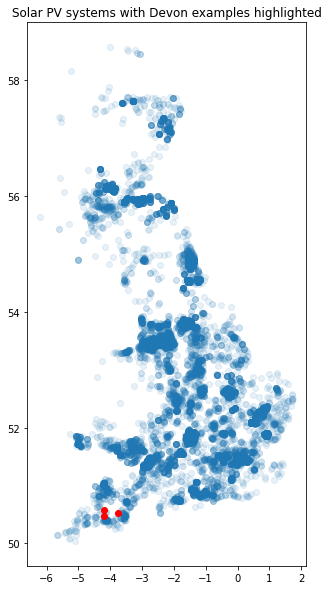

In [41]:
example_pvs = metadata_df[(metadata_df.ss_id == 20984) | (metadata_df.ss_id == 21832) | (metadata_df.ss_id == 6848)]

fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
ax.scatter(example_pvs.longitude_rounded, example_pvs.latitude_rounded, color='red')
plt.title("Solar PV systems with Devon examples highlighted");
plt.savefig('images/pv_sites.jpg')

In [4]:
pv_power = xr.open_dataset("data/uk_pv/pv.netcdf", engine="h5netcdf")

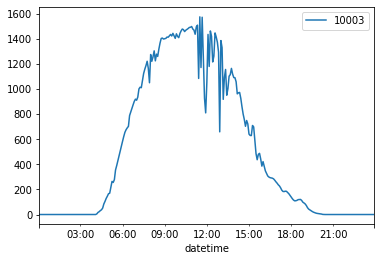

In [19]:
on_pv_system = pv_power['10003'].to_dataframe()
on_pv_system = on_pv_system[on_pv_system.index < '2021-06-02']
on_pv_system = on_pv_system[on_pv_system.index > '2021-06-01']

on_pv_system.plot()
# plt.savefig('PV_yield_one_site.jpg')

In [5]:
metadata_df.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


In [6]:
on_pv_system.shape

(287, 1)

In [7]:
on_pv_system.head()

,10003
datetime,
2021-06-01 00:05:00,0.0
2021-06-01 00:10:00,0.0
2021-06-01 00:15:00,0.0
2021-06-01 00:20:00,0.0
2021-06-01 00:25:00,0.0


In [8]:
print(pv_power['10003'])

<xarray.DataArray '10003' (datetime: 387254)>
[387254 values with dtype=float32]
Coordinates:
  * datetime  (datetime) datetime64[ns] 2018-01-01T06:05:00 ... 2021-10-27T23...


In [9]:
# The data variables are the same as 'ss_id' in the metadata. 
# Each data variable contains the solar generation (in kw) for that PV system. 
# The ss_id's here are a subset of all the ss_id's in the metadata 
# The coordinates of the date are tagged as 'datetime' which is the datetime of the solar generation reading.


In [3]:
pv_power = xr.open_dataset("data/uk_pv/pv.netcdf", engine="h5netcdf")
# PV yield is every 5 minutes, from 2018-01-01 to 2021-10-27, from 6am to 7pm

devon_pv_df = pv_power['6848'].to_dataframe()

# cropping for 2020-01-01 to 2021-11-07

devon_pv_df = devon_pv_df[devon_pv_df.index < '2021-11-07']
devon_pv_df = devon_pv_df[devon_pv_df.index > '2020-01-01']

In [18]:
ts = devon_pv_df.index[1]
ts_list = devon_pv_df.index[1:3]

devon_pv_df[devon_pv_df.index==ts]
#devon_pv_df[devon_pv_df.index in ts_list]

,6848
datetime,
2020-01-01 00:10:00,NaN
